In [17]:
import matplotlib.pyplot as plt
import SimpleITK

In [18]:
SimpleITK.__version__

'2.3.1'

In [19]:
#read image inside SimpleITK format
img = SimpleITK.ReadImage("./data/roman.png", SimpleITK.sitkInt8)
img = SimpleITK.Cast(img, SimpleITK.sitkFloat64)

In [20]:
type(img)

SimpleITK.SimpleITK.Image

In [21]:
edge1 = SimpleITK.CannyEdgeDetection(img, lowerThreshold=10, upperThreshold=15, variance= [1, 1])

In [22]:
#convert to numpy array for imshow
edge1 = SimpleITK.GetArrayFromImage(edge1)

In [23]:
type(edge1)

numpy.ndarray

In [24]:
edge1.shape

(640, 960)

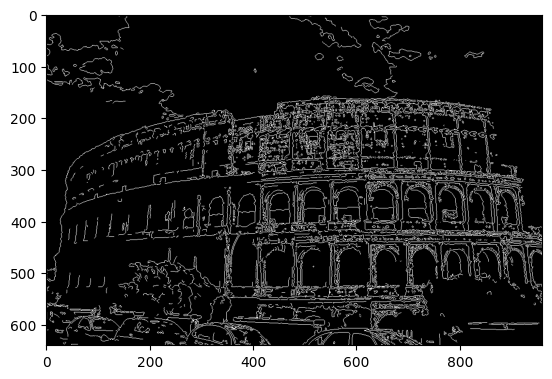

In [25]:
plt.imshow(edge1, cmap="grey")

In [26]:
edge2 = SimpleITK.CannyEdgeDetection(img, lowerThreshold=5, upperThreshold=10, variance= [1, 1])

In [27]:
edge2 = SimpleITK.GetArrayFromImage(edge2)

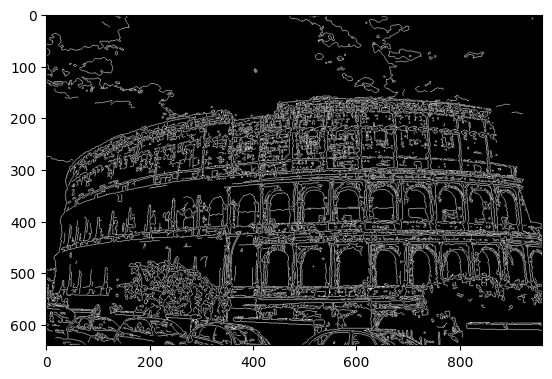

In [28]:
plt.imshow(edge2, cmap="grey")

In [29]:
edge3 = SimpleITK.CannyEdgeDetection(img, lowerThreshold=30, upperThreshold=40, variance= [1, 1])

In [30]:
edge3 = SimpleITK.GetArrayFromImage(edge3)

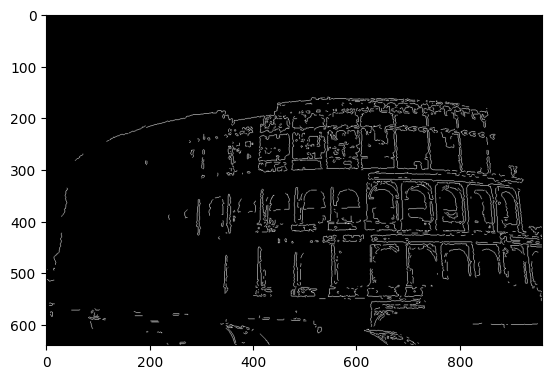

In [31]:
plt.imshow(edge3, cmap="grey")

In [ ]:
# apply SimpleITK the same to roman.png

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [36]:
rec = cv2.imread("./data/recording.jpg")

In [45]:
rec = cv2.cvtColor(rec, cv2.COLOR_BGR2GRAY)

In [46]:
type(rec)

numpy.ndarray

In [47]:
rec.shape

(851, 1280)

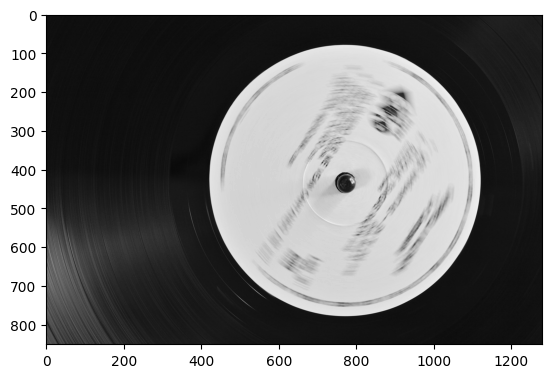

In [51]:
plt.imshow(rec, cmap="gray")

In [80]:
thresh = 150
maxvalue = 255
th, dst = cv2.threshold(rec,thresh,maxvalue,cv2.THRESH_BINARY)

In [74]:
type(th), type(dst)

(float, numpy.ndarray)

In [71]:
th, dst

(254.0,
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [65]:
dst.max(),dst.min()

(255, 0)

In [66]:
dst

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

In [67]:
dst.shape

(851, 1280)

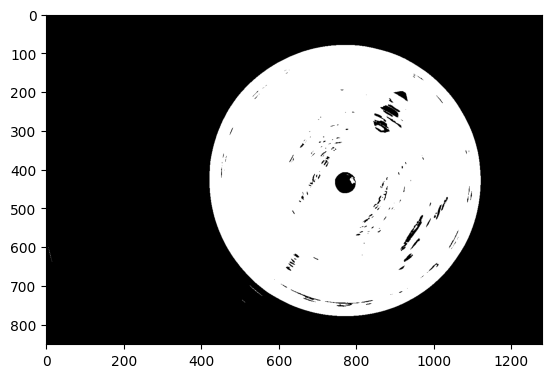

In [81]:
plt.imshow(dst, cmap="gray")

In [84]:
dst.std() #121 --> white

121.2348837541165